In [2]:
import sgGSEA as sg
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
# Show names of all queryable gene set libraries.
sg.show_library_names()

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_2023',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'ChEA_2022',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_CRISPR_GeneDependency_CellLines_2023',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019',
 'Descartes_Cell_Types_and_Tissue_2

In [61]:
pathways = ["GO:0006935", "GO:0050900", "GO:0050901","GO:0042110", "GO:0030036", "GO:0038032", "GO:0007155", "GO:0007229",  "GO:0030335", "GO:2000408", "GO:0071347", "GO:0050776", "GO:0008369", "GO:0051493"]
pathways = {p: None for p in pathways}

In [62]:
for version in ["2013", "2015", "2017", "2017b", "2018", "2021", "2023"]:
    go_bp = sg.get_library(f'GO_Biological_Process_{version}')
    gene_sets = sg.show_gene_set_names(go_bp)
    for p in pathways:
        if not pathways[p]:
            for g in gene_sets:
                if p in g:
                    pathways[p] = sg.get_gene_set(go_bp, g)

In [66]:
pathways.keys()

dict_keys(['GO:0006935', 'GO:0050900', 'GO:0050901', 'GO:0042110', 'GO:0030036', 'GO:0038032', 'GO:0007155', 'GO:0007229', 'GO:0030335', 'GO:2000408', 'GO:0071347', 'GO:0050776', 'GO:0008369', 'GO:0051493'])

In [69]:
query_gene_set = sg.get_query_gene_set("data/pd_PD_with_TcvsCtrl_with_Tc_deg.csv", alpha=0.01)

In [71]:
results_pagerank = sg.rank_genes('networks/iid_brain_ppi.txt', target_gene_set=pathways['GO:0006935'], centrality='pagerank', query_gene_set=query_gene_set, sep=",")

In [78]:
# Show the results for the pagerank centrality.
results_pagerank[results_pagerank["in_target_gene_set"] == True].sort_values("pagerank", ascending=False).iloc[:20]

,symbol,pagerank,p_value,degree,in_target_gene_set
36,CCL5,0.220249,0.009901,366,True
19,CCL2,0.204941,0.009901,271,True
73,CXCL9,0.192691,0.009901,78,True
48,CXCL10,0.187496,0.009901,203,True
51,CCL28,0.185406,0.009901,21,True
44,CCR5,0.184706,0.009901,109,True
42,CXCL14,0.183340,0.009901,10,True
59,ITGB2,0.179229,0.009901,282,True
31,PLP2,0.161210,0.009901,48,True
115,CORO1A,0.160487,0.019802,142,True


In [80]:
# Same command but this time using betweenness centrality.
results_betweenness = sg.rank_genes('networks/BioGRID.txt', target_gene_set=pathways['GO:0006935'], centrality='betweenness', query_gene_set=None)

In [81]:
results_betweenness[results_betweenness["in_target_gene_set"] == True].sort_values("betweenness", ascending=False).iloc[:20]

,symbol,betweenness,p_value,degree,in_target_gene_set
24,EDNRB,0.011565,0.009901,27,True
241,CXCL13,0.007399,0.009901,4,True
276,CCL5,0.005228,0.009901,34,True
162,CXCL9,0.002269,0.009901,7,True
479,CCL7,0.001911,0.019802,7,True
568,CCL22,0.001876,0.019802,33,True
136,CCR5,0.001719,0.009901,17,True
1268,HRAS,0.001373,0.039604,95,True
310,CXCL11,0.001356,0.009901,2,True
318,CCR1,0.001355,0.009901,18,True


<Axes: xlabel='degree', ylabel='pagerank'>

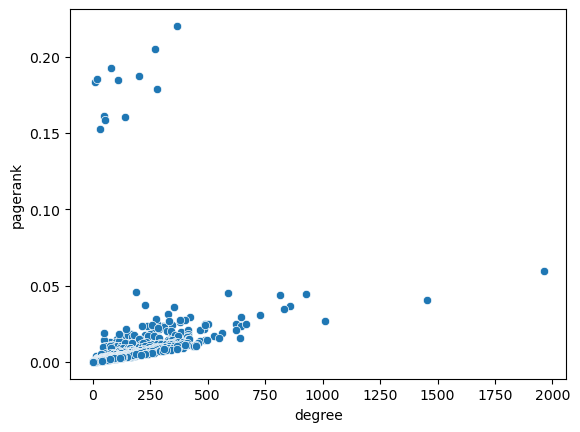

In [82]:
# Positive correlation between degree and pagerank centrality.
sns.scatterplot(data=results_pagerank, x='degree', y='pagerank')

<Axes: xlabel='degree', ylabel='p_value'>

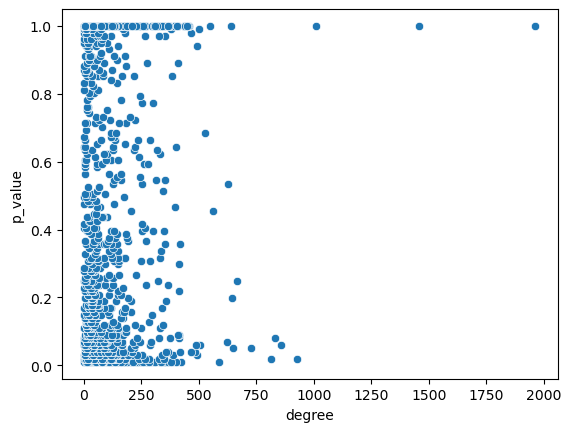

In [83]:
# Apparently no correlation for P-value
sns.scatterplot(data=results_pagerank,x='degree', y='p_value')

<Axes: xlabel='degree', ylabel='betweenness'>

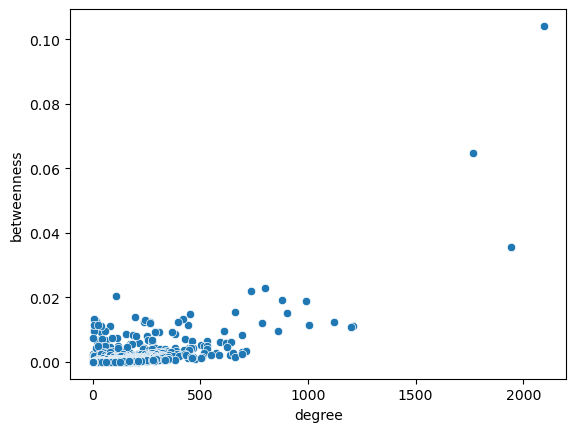

In [84]:
# Linear trend between degree and pagerank centrality.
sns.scatterplot(data=results_betweenness, x='degree', y='betweenness')

<Axes: xlabel='degree', ylabel='p_value'>

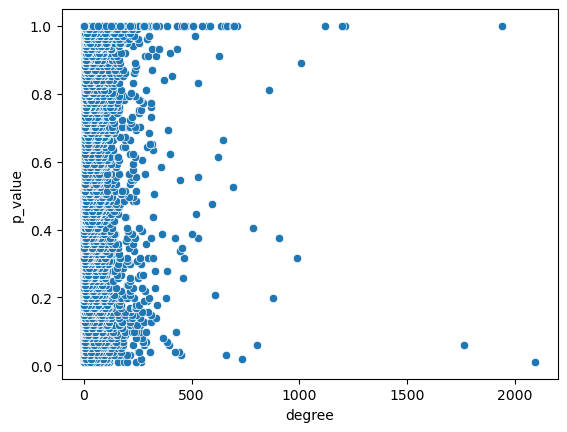

In [85]:
# Apparently no correlation for P-value.
sns.scatterplot(data=results_betweenness, x='degree', y='p_value')